In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../dataset/dataset.csv')

# Inspect the dataset
print(df.head())



   flags                                        instruction category  \
0      B   question about cancelling order {{Order Number}}    ORDER   
1    BQZ  i have a question about cancelling oorder {{Or...    ORDER   
2   BLQZ    i need help cancelling puchase {{Order Number}}    ORDER   
3     BL         I need to cancel purchase {{Order Number}}    ORDER   
4  BCELN  I cannot afford this order, cancel purchase {{...    ORDER   

         intent                                           response  
0  cancel_order  I've understood you have a question regarding ...  
1  cancel_order  I've been informed that you have a question ab...  
2  cancel_order  I can sense that you're seeking assistance wit...  
3  cancel_order  I understood that you need assistance with can...  
4  cancel_order  I'm sensitive to the fact that you're facing f...  


In [3]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['category'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 category
ACCOUNT         5986
ORDER           3988
REFUND          2992
INVOICE         1999
CONTACT         1999
PAYMENT         1998
FEEDBACK        1997
DELIVERY        1994
SHIPPING        1970
SUBSCRIPTION     999
CANCEL           950
Name: count, dtype: int64


In [4]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['intent'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 intent
edit_account                1000
switch_account              1000
check_invoice               1000
complaint                   1000
contact_customer_service    1000
delivery_period              999
registration_problems        999
check_payment_methods        999
contact_human_agent          999
payment_issue                999
newsletter_subscription      999
get_invoice                  999
place_order                  998
cancel_order                 998
track_refund                 998
change_order                 997
get_refund                   997
create_account               997
check_refund_policy          997
review                       997
set_up_shipping_address      997
delivery_options             995
delete_account               995
recover_password             995
track_order                  995
change_shipping_address      973
check_cancellation_fee       950
Name: count, dtype: int64


In [5]:
# List of intents to drop
intents_to_drop = [
    'create_account',
    'change_order',
    'switch_account',
    'track_order',
    'edit_account',
    'track_refund',
    'delivery_options',
    'cancel_order'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]



In [6]:
# Group by 'intent' and 'category' and count the occurrences
intent_category_counts = df.groupby(['intent', 'category']).size().reset_index(name='count')

# Sort by 'category' and then by 'count' in descending order
intent_category_counts = intent_category_counts.sort_values(by=['category', 'count'], ascending=[True, False])

# Display the result
print(intent_category_counts)


                      intent      category  count
16     registration_problems       ACCOUNT    999
8             delete_account       ACCOUNT    995
15          recover_password       ACCOUNT    995
1     check_cancellation_fee        CANCEL    950
6   contact_customer_service       CONTACT   1000
7        contact_human_agent       CONTACT    999
9            delivery_period      DELIVERY    999
5                  complaint      FEEDBACK   1000
17                    review      FEEDBACK    997
2              check_invoice       INVOICE   1000
10               get_invoice       INVOICE    999
14               place_order         ORDER    998
3      check_payment_methods       PAYMENT    999
13             payment_issue       PAYMENT    999
4        check_refund_policy        REFUND    997
11                get_refund        REFUND    997
18   set_up_shipping_address      SHIPPING    997
0    change_shipping_address      SHIPPING    973
12   newsletter_subscription  SUBSCRIPTION    999


In [7]:
# List of intents to drop
intents_to_drop = [
    'registration_problems',
    'check_cancellation_fee',
    'delivery_period',
    'place_order',
    'newsletter_subscription'
]

# Drop rows where 'intent' is in the list of intents to drop
df = df[~df['intent'].isin(intents_to_drop)]



# Display the updated DataFrame
print(df)


      flags                                        instruction  category  \
1995     BL  give me information about a delivery address m...  SHIPPING   
1996    BLQ                          need to update my address  SHIPPING   
1997    BCL               I entered a wrong address, update it  SHIPPING   
1998   BLQZ              i have an trouble editing the address  SHIPPING   
1999     BL                help modifying the shipping address  SHIPPING   
...     ...                                                ...       ...   
23874   BIL  what do I need to do to set my shipping addres...  SHIPPING   
23875    BL                issue entering the shipping address  SHIPPING   
23876   BLM  there are errors setting up a different shippi...  SHIPPING   
23877  BCLP  I would like to set up the new shipping addres...  SHIPPING   
23878   BIL    can you help me set up my new shipping address?  SHIPPING   

                        intent  \
1995   change_shipping_address   
1996   change_shipp

In [8]:
# Get the total number of unique intent labels
unique_intent_count = df['intent'].nunique()

# Display the result
print(f'Total unique intent labels: {unique_intent_count}')


Total unique intent labels: 14


In [9]:
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'category'
category_counts = df['category'].value_counts()


# Print the category counts as a table
print("Category Counts:\n", category_counts)


Category Counts:
 category
INVOICE     1999
CONTACT     1999
PAYMENT     1998
FEEDBACK    1997
REFUND      1994
ACCOUNT     1990
SHIPPING    1970
Name: count, dtype: int64


In [ ]:
# Group by 'intent' and 'category' and count the rows
result = df.groupby(['intent', 'category']).size().reset_index(name='total_count')

# Sort the result by 'category' in ascending order
result = result.sort_values(by='category', ascending=True)

# Print the result
print(result)


                      intent  category  total_count
7             delete_account   ACCOUNT          995
11          recover_password   ACCOUNT          995
5   contact_customer_service   CONTACT         1000
6        contact_human_agent   CONTACT          999
4                  complaint  FEEDBACK         1000
12                    review  FEEDBACK          997
1              check_invoice   INVOICE         1000
8                get_invoice   INVOICE          999
2      check_payment_methods   PAYMENT          999
10             payment_issue   PAYMENT          999
3        check_refund_policy    REFUND          997
9                 get_refund    REFUND          997
0    change_shipping_address  SHIPPING          973
13   set_up_shipping_address  SHIPPING          997


                      intent  category  total_count
7             delete_account   ACCOUNT          995
11          recover_password   ACCOUNT          995
5   contact_customer_service   CONTACT         1000
6        contact_human_agent   CONTACT          999
4                  complaint  FEEDBACK         1000
12                    review  FEEDBACK          997
1              check_invoice   INVOICE         1000
8                get_invoice   INVOICE          999
2      check_payment_methods   PAYMENT          999
10             payment_issue   PAYMENT          999
3        check_refund_policy    REFUND          997
9                 get_refund    REFUND          997
0    change_shipping_address  SHIPPING          973
13   set_up_shipping_address  SHIPPING          997


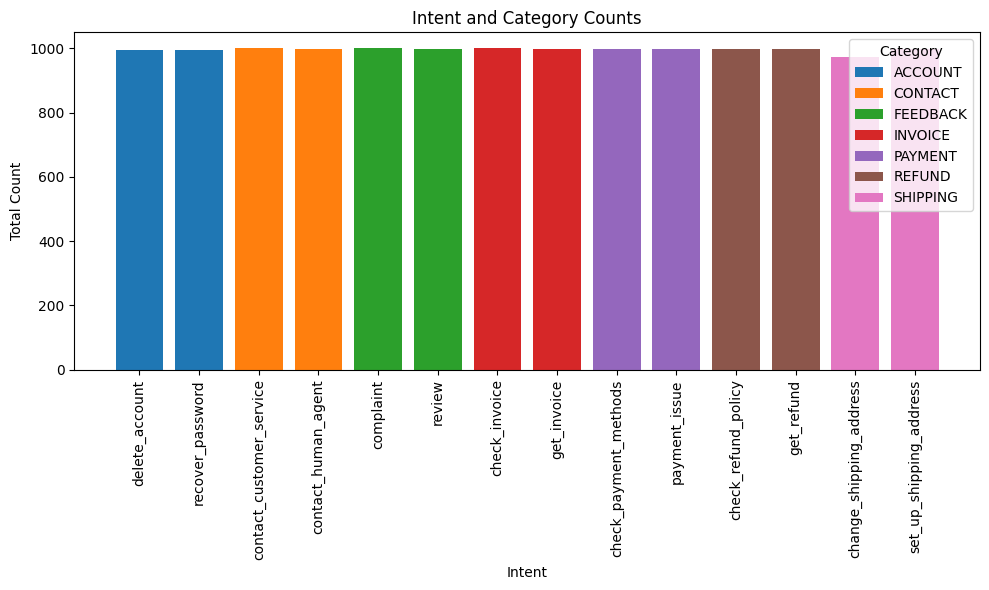

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by 'intent' and 'category' and count the rows
result = df.groupby(['intent', 'category']).size().reset_index(name='total_count')

# Sort the result by 'category' in ascending order
result = result.sort_values(by='category', ascending=True)

# Print the result
print(result)

# Plot the result
plt.figure(figsize=(10, 6))
for category in result['category'].unique():
    subset = result[result['category'] == category]
    plt.bar(subset['intent'], subset['total_count'], label=category)

plt.xlabel('Intent')
plt.ylabel('Total Count')
plt.title('Intent and Category Counts')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Drop all columns except 'instruction', 'intent', and 'category'
df = df[['instruction', 'intent', 'category']]

# Display the updated DataFrame
print(df.head())


In [ ]:
df.to_csv('intent_category.csv', index=False)
